<a href="https://colab.research.google.com/github/duckbillLvr/software-lecture/blob/main/lecture4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install finterstellar

In [7]:
import finterstellar as fs

### 가치지표 결합하기
- 가치주를 찾는 4가지 방법(PER, PBR, PSR, PCR)
> PER : 기업의 이익을 중요시  
PBR : 기업의 안정성을 중요시  
PSR : 이익도 이익이지만 기업이 함부로 조작할 수 없는 매출을 중요시  
PCR : 현금 창출능력을 중요시  

- 가치지표 결합은 위의 방법을 적절히 결합하여 투자하는 방법이다.  


PER과 PBR을 이용한 가치지표 결합
1. 교집합  
> 최초 PER과 PBR에서 각각 10종목씩 선택했다면 교집합은 10개 이하의 종목이 나온다.  
10개 종목에 투자하고 싶다면 PER, PBR 각각 10개보다 많은 종목을 뽑고 교집합하여 추려야한다.

2. 합산점수
> 각각 얼마나 뽑아야 할지 신경 쓰지 않아도 되지만 대신 어떻게 점수를 매길지를 정해야 한다.  
상대평가제 경우 낮은 종목부터 100점으로 점수를 매겨, 99점, 98점과 같이 배점한다.  
절대평가제인 경우 최고점을 PER 1배, 최하점을 PER 10배 식의 기준으로 점수를 배점한다.

In [8]:
# PER과 PBR의 시그널 생성(하위 20개 종목 선택)
t = '2020Q3'
data = fs.fn_consolidated(otp='16486230601099712210', term=t, vol=0)
data['PER'] = data['Price_M3'] / data['EPS']
data['PBR'] = data['Price_M3'] / (data['Shareholders Equity'] / data['Shares'])
s1 = fs.fn_filter(data, by='PER', floor=1, cap=10, n=20, asc=True) # PER 기준 하위 20개 종목 선택
s2 = fs.fn_filter(data, by='PBR', floor=.1, cap=1, n=20, asc=True) # PBR 기준 하위 20개 종목 선택

2020Q3...OK


In [9]:
print(s1)
print(s2)

             PER
symbol          
VHC     1.250620
UIS     1.348869
JOB     1.538462
MX      1.575758
SND     1.577982
VTOL    1.613744
TNK     1.658133
LIVE    1.919629
BMA     1.941397
LODE    1.962264
CTO     2.126072
FRO     2.245487
TROX    2.270186
DHT     2.324444
BIG     2.329354
DX      2.354497
GGAL    2.355795
TPHS    2.358491
NRG     2.382614
FVE     2.387543
             PBR
symbol          
REI     0.103666
ACOR    0.104986
TNP     0.105140
GECC    0.105790
LTRPA   0.115385
BORR    0.120192
RIG     0.124788
GNW     0.125471
GLOP    0.136601
GURE    0.149526
SMHI    0.155095
CDEV    0.155154
FET     0.155406
GASS    0.157510
IRS     0.166423
BBGI    0.168959
NMM     0.174185
TCOM    0.174534
BHF     0.183101
WPG     0.190015


In [10]:
fs.combine_signal(s1, s2, how='and') # 교집합 종목 선택

,PER,PBR
symbol,,


In [11]:
fs.combine_signal(s1, s2, how='or') # 합집합 종목 선택 !큰 의미 X

,PER,PBR
symbol,,
ACOR,NaN,0.104986
BBGI,NaN,0.168959
BHF,NaN,0.183101
BIG,2.329354,NaN
BMA,1.941397,NaN
BORR,NaN,0.120192
CDEV,NaN,0.155154
CTO,2.126072,NaN
DHT,2.324444,NaN


In [12]:
# 절대평가
s1 = fs.fn_score(data, by='PER', method='absolute', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='absolute', floor=.1, cap=1, asc=True)

In [13]:
# PER, PBR 절대점수 확인
print(s1)
print(s2)

             PER  Score
symbol                 
VHC     1.250620   97.2
UIS     1.348869   96.1
JOB     1.538462   94.0
MX      1.575758   93.6
SND     1.577982   93.6
...          ...    ...
CZWI    9.900000    1.1
LCNB    9.925676    0.8
RDN     9.926471    0.8
FISI    9.955752    0.5
EBTC    9.980469    0.2

[294 rows x 2 columns]
             PBR  Score
symbol                 
REI     0.103666   99.6
ACOR    0.104986   99.4
TNP     0.105140   99.4
GECC    0.105790   99.4
LTRPA   0.115385   98.3
...          ...    ...
STCN    0.997557    0.3
SITC    0.997706    0.3
FCF     0.998493    0.2
TEVA    0.998527    0.2
CRS     0.999287    0.1

[811 rows x 2 columns]


In [14]:
fs.combine_score(s1, s2, n=10)

,Score,Score_,Sum
symbol,,,
SND,46.80,42.40,89.20
GECC,38.75,49.70,88.45
TNK,46.35,37.65,84.00
STNG,36.90,39.60,76.50
PVL,37.10,37.20,74.30
LIVE,44.90,28.60,73.50
AEL,39.25,32.50,71.75
JOB,47.00,24.70,71.70
TNP,20.70,49.70,70.40


In [15]:
# 상대평가
f1 = fs.fn_score(data, by='PER', method='relative', floor=1, cap=10, asc=True)
f2=  fs.fn_score(data, by='PBR', method='relative', floor=.1, cap=1, asc=True)

In [16]:
# PER, PBR 상대평가 점수 확인
print(f1)
print(f2)

             PER  Score
symbol                 
VHC     1.250620  100.0
UIS     1.348869   99.7
JOB     1.538462   99.3
MX      1.575758   99.0
SND     1.577982   98.6
...          ...    ...
CZWI    9.900000    1.7
LCNB    9.925676    1.4
RDN     9.926471    1.0
FISI    9.955752    0.7
EBTC    9.980469    0.3

[294 rows x 2 columns]
             PBR  Score
symbol                 
REI     0.103666  100.0
ACOR    0.104986   99.9
TNP     0.105140   99.8
GECC    0.105790   99.6
LTRPA   0.115385   99.5
...          ...    ...
STCN    0.997557    0.6
SITC    0.997706    0.5
FCF     0.998493    0.4
TEVA    0.998527    0.2
CRS     0.999287    0.1

[811 rows x 2 columns]


In [17]:
fs.combine_score(f1, f2, n=10) # 상대평가 합산점수 하위 10개

,Score,Score_,Sum
symbol,,,
SND,49.30,47.90,97.20
GECC,45.60,49.80,95.40
TNK,49.00,45.80,94.80
STNG,44.75,46.75,91.50
PVL,44.90,45.55,90.45
LIVE,48.80,40.90,89.70
AEL,45.90,43.10,89.00
TRMD,44.55,43.65,88.20
JOB,49.65,38.20,87.85


#### 가치투자 4대장 콤포
- 슈퍼가치전략 : PER, PBR, PCR, PSR 지표를 섞어서 사용

In [18]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
terms

Index(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
       '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
       '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

In [19]:
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486230601099712210', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


#### 시가총액 PER, PBR, PSR, PCR 계산
- 주가는 모두 3개월 후 주가(Price_M3)를 이용

In [20]:
 for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가 총액 계산
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares'])

In [21]:
data['2020Q4'].sort_values(by='Market Cap', ascending=False).head() #시가총액을 기준으로 내림차순

,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,name,name_kr,sector,industry,avg_volume,Market Cap,PER,PBR,PSR,PCR
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,2020Q4,294239.0,179823.0,114416.0,20350.0,74253.0,63930.0,3.7175,85508.0,74253.0,...,Apple Inc,애플,Technology,Consumer Electronics,186217000,2.068610e+06,32.858104,31.236565,7.030374,27.641914
MSFT,2020Q4,153284.0,48510.0,104774.0,24693.0,60155.0,51310.0,6.7800,72183.0,60155.0,...,Microsoft Corp,마이크로소프트,Technology,Software Infrastructure,33185700,1.781242e+06,34.774336,13.677035,11.620537,28.122807
AMZN,2020Q4,386064.0,233307.0,152757.0,87194.0,22899.0,21331.0,42.3000,47654.0,22899.0,...,Amazon.com Inc,아마존닷컴,Consumer Cyclical,Internet Retail,5822800,1.553228e+06,73.146099,16.629140,4.023240,33.343956
GOOGL,2020Q4,182527.0,84732.0,97795.0,28998.0,41224.0,40269.0,59.2600,54921.0,41224.0,...,Alphabet Inc Class A,알파벳 Class A,Communication Services,Internet Content & Information,2787070,1.404197e+06,34.804590,6.309748,7.693090,26.020024
GOOG,2020Q4,182528.0,84732.0,97796.0,28998.0,41224.0,40269.0,59.0200,54922.0,41224.0,...,Alphabet Inc Class C,알파벳 Class C,Communication Services,Internet Content & Information,2618030,1.398394e+06,35.049644,6.283674,7.661257,25.912498


In [22]:
# 소형주를 뽑아내기 위해 시가총액 기준으로 필터링하고 PER, PBR, PSR, PCR의 상대 점수를 구한다.
# 매겨진 점수를 각각 s1~5까지 딕셔너리에 저장
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 시가 총액 하위 1000개 종목 선정
  s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
  s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)

In [23]:
s6 = {}
for t in terms:
  s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t]) # 지표 점수 합산

In [24]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50) # 상대점수 합산 후 하위 50개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

In [25]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 11.05%
Accumulated return: 185.55%
Investment period: 10.0yrs
Sharpe ratio: 0.57
MDD: -51.92%


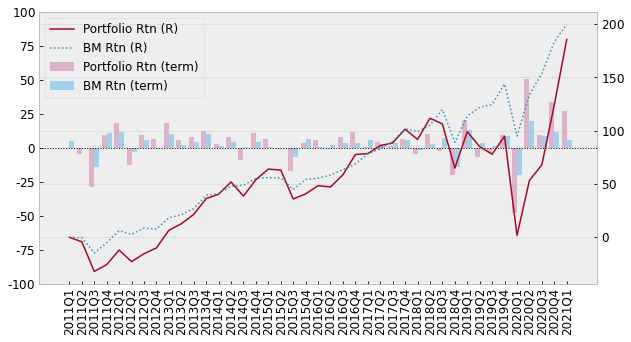

In [26]:
fs.draw_return(df) # 기간별 수익률 그래프 그려보기

In [27]:
# 4대장 + 소형주 전략 코드 모아쓰기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486230601099712210', term=t)

s1, s2, s3, s4, s5, s6 = {}, {}, {}, {}, {}, {}
s, signal = {}, {}
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가 총액 계산
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares'])
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 시가 총액 하위 1000개 종목 선정
  s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
  s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
  s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t]) # 지표 점수 합산
  s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50) # 상대점수 합산 후 하위 50개 종목 선정)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 11.05%
Accumulated return: 185.55%
Investment period: 10.0yrs
Sharpe ratio: 0.57
MDD: -51.92%


In [28]:
# 4대장 + 대형주 전략 코드 모아쓰기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486230601099712210', term=t)

s1, s2, s3, s4, s5, s6 = {}, {}, {}, {}, {}, {}
s, signal = {}, {}
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가 총액 계산
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares'])
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=False) # 시가 총액 상위 1000개 종목 선정
  s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
  s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
  s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t]) # 지표 점수 합산
  s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50) # 상대점수 합산 후 하위 50개 종목 선정)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 5.06%
Accumulated return: 63.91%
Investment period: 10.0yrs
Sharpe ratio: 0.26
MDD: -49.45%


### 실적 대비 기업가치, EV/EBITDA & EV/Sales
- 회사의 주식을 사는데 필요한 비용은 지분가치(Equity Value)이고, 지분가치와 더불어 부채까지 해결하는데 필요한 비용이 진정한 기업가치(Enterprise Value)이다.  
- EV는 원래 주식투자보다 M&A 세계에서 사용하는 개념으로 **기업을 인수하는데 들어가는 총비용**을 의미한다.  
- EV 산식은 다음과 같다.  
> EV = 시가총액 + 순차입금 = 시가총액 + (차입금 - 현금성자산)

EV는 EV/EBITDA, EV/Sales 등 다른 재무제표 지표와 결합해 멀티플을 만들어 기업가치를 상대평가 하는데 이용된다.

EV/EBITDA
- **당기순이익에서 이자, 세금, 감가상각비를 제외하기 전 영업이익**을 뜻하며, 재무제표의 영업이익항목에 감가상각비를 더한 금액이다.
>EV/EVITDA = $\frac{EV}{EBITDA}$ = $\frac{시가총액+차입금}{영업이익+감가상각비}$  
매출액대비시가총액(PSR) = $\frac{시가총액}{매출액}$  
EV/Sales = $\frac{EV}{Sales}$=$\frac{시가총액+차입금}{매출액}$

In [29]:
df = fs.fn_single(otp='16486230601099712210', symbol='NKE', window='T') # 나이키(NKE) 제무제표 데이터 불러오기

In [30]:
# EV = 시가총액 + 차입금 - 현금성자산
df['Market Cap'] = df['Price'] * df['Shares'] # 시가총액
df['EV'] = df['Market Cap'] + df['Long Term Debt'] + df['Current Debt'] - df['Cash & Equivalents'] # EV 계산

In [31]:
df['EV/EBITDA'] = df['EV'] / df['EBITDA']

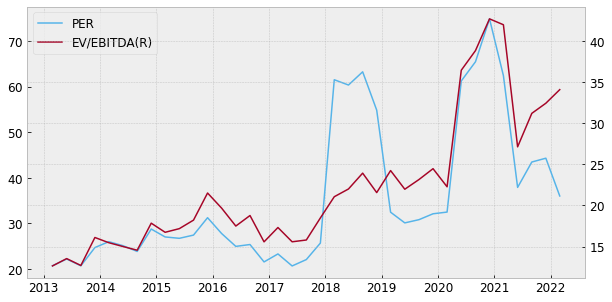

In [35]:
# EV/EVITDA 와 PER 비교
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='EV/EBITDA')

- EV를 계산하고 EV/Salse 추이를 차트로 그려본다.
> EV/Sales = EV / 매출액
EV/Sales와 PSR 비교 그래프

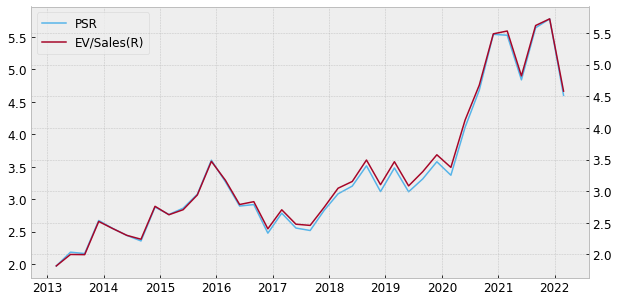

In [36]:
df['EV/Sales'] = df['EV'] / df['Revenue'] # EV/Sales 계산
df['PSR'] = df['Price'] / (df['Revenue']/df['Shares']) # PSR
fs.draw_chart(df, left='PSR', right='EV/Sales') # PSR 대비 EV/Sales 비교

#### EV/EVITDA 전략 백테스팅
- 분기별로 EV/EVITDA 값이 낮은 순서대로 상위 30개 종목에 투자하는 전략 테스트

In [37]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486230601099712210', term=t)
s, signal = {}, {}
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents'] # 분기별 EV 계산
  data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA']
  data[t].loc[(data[t]['EV'] <= 0) | (data[t]['EBITDA'] <= 0), 'EV/EBITDA'] = float('nan') # EV가 음수 or EBITDA가 음수일 경우 nan으로 처리
  s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True) # EV/EVITDA 기준 하위 30개 종목 선정
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백 테스트

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 9.48%
Accumulated return: 147.56%
Investment period: 10.0yrs
Sharpe ratio: 0.51
MDD: -49.39%


EV/Sales 전략 백테스팅
- 분기별로 EV/Sales 값이 낮은 순서대로 상위 30개 종목에 투자하는 테스트

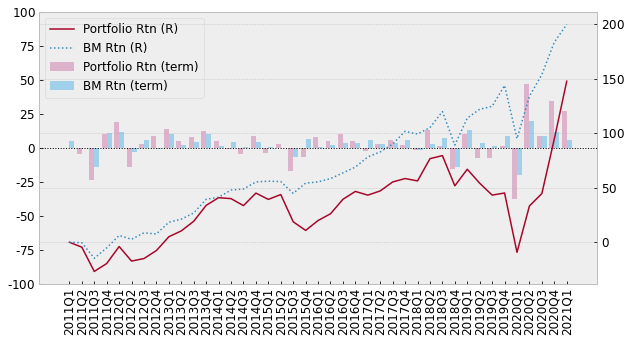

In [38]:
fs.draw_return(df) # 기간별 수익률 그래프

In [39]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486230601099712210', term=t)
s, signal = {}, {}
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents'] # 분기별 EV 계산
  data[t]['EV/Sales'] = data[t]['EV'] / data[t]['Revenue']
  data[t].loc[(data[t]['EV'] <= 0) | (data[t]['Revenue'] <= 0), 'EV/Revenue'] = float('nan') # EV가 음수 or EBITDA가 음수일 경우 nan으로 처리
  s[t] = fs.fn_filter(data[t], by='EV/Sales', floor=0, n=30, asc=True) # EV/EVITDA 기준 하위 30개 종목 선정
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 27.30%
Accumulated return: 1019.81%
Investment period: 10.0yrs
Sharpe ratio: 3.04
MDD: -26.79%


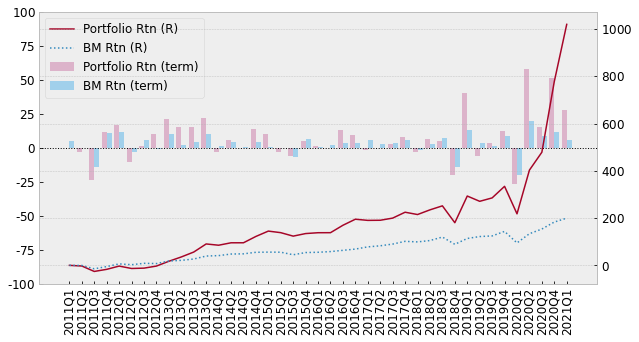

In [40]:
fs.draw_return(df)

### 안전마진이 있는 그레이엄의 NCAV(청산가치) 투자법
- 청산가치 = 유동자산 - 부채  
> 유동자산 : 1년안에 현금화 가능한 자산  
비유동자산 : 부동산, 공장, 기계 설비 등 현금화가 쉽지 않은 자산  

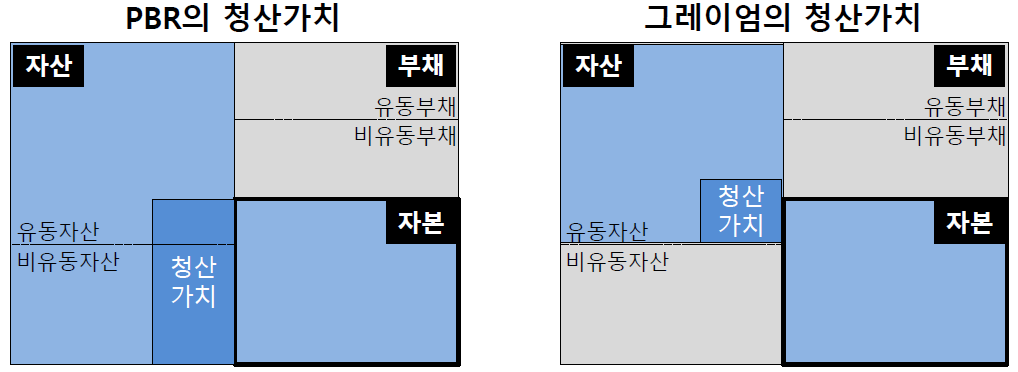

- 그레이엄표 안전마진 : 청산가치가 시가총액 1.5이상인 기업  
안전마진 = 청산가치 - (시가총액 X 1.5) = (유동자산 - 부채) - (시가총액 X 1.5)

In [41]:
df = fs.fn_single(otp='16486230601099712210', symbol='FB', window='T')

- 청산가치(NCAV) = 유동자산 - 총부채  
- 시가총액 = 주가 X 주식수  
- 안전마진 = NCAV - 시가총액 X 1.5

In [43]:
df['NCAV'] = df['Current Assets'] - df['Total Liabilities'] # 청산가치
df['Market Cap'] = df['Price'] * df['Shares'] # 시가총액 계산
df['Safety Margin'] = df['NCAV'] - df['Market Cap'] * 1.5 # 안전마진 계산

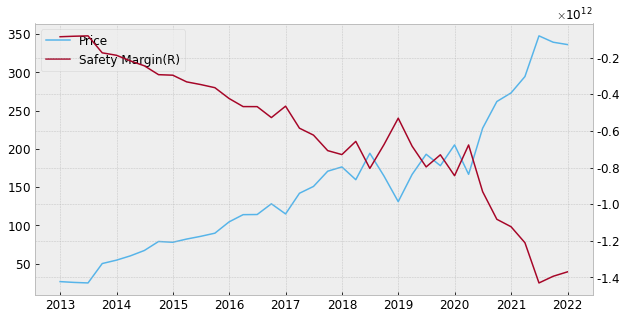

In [44]:
# 주가 대비 안전마진 비교 그래프
fs.draw_chart(df, left='Price', right='Safety Margin')

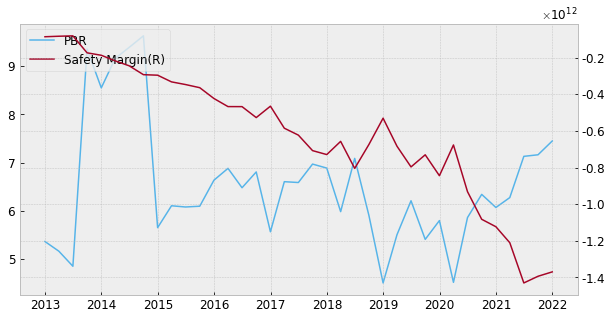

In [45]:
# PBR 대비 안전마진 비교 그래프
df['PBR'] = df['Price'] / (df['Shareholders Equity'] / df['Shares'])
fs.draw_chart(df, left='PBR', right='Safety Margin')

In [50]:
# 안전마진이 있는 그레이엄의 NCAV(청산가치) 투자법
# 백테스팅
# Safety Margin Code
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486230601099712210', term=t, vol=10000)

s , signla = {}, {}
for t in terms:
  data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities'] # 청산가치 NCAV
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap'] * 1.5 # 안전마진 계산
  s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False) # 안전마진 기준 상위 30개 종목 선정
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 24.39%
Accumulated return: 788.32%
Investment period: 10.0yrs
Sharpe ratio: 2.51
MDD: -5.93%


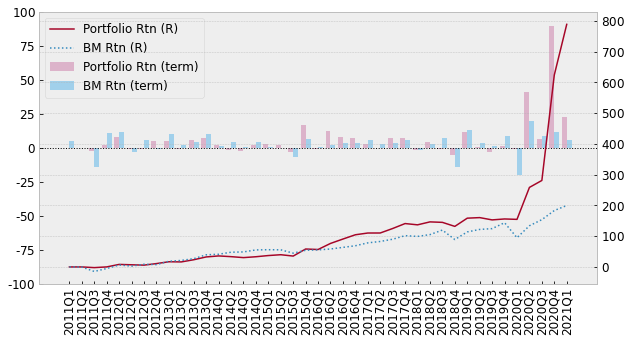

In [51]:
fs.draw_return(df)

- 분기별로 안전 마진 값이 큰 순서대로 상위 30개 종목에 투자하는 전략 분기별 확인

In [52]:
for k, v in signal.items():
  print(k, len(v))

2010Q4 0
2011Q1 4
2011Q2 14
2011Q3 12
2011Q4 8
2012Q1 13
2012Q2 12
2012Q3 14
2012Q4 9
2013Q1 9
2013Q2 7
2013Q3 4
2013Q4 5
2014Q1 7
2014Q2 7
2014Q3 7
2014Q4 8
2015Q1 7
2015Q2 11
2015Q3 12
2015Q4 9
2016Q1 15
2016Q2 9
2016Q3 14
2016Q4 6
2017Q1 12
2017Q2 11
2017Q3 6
2017Q4 7
2018Q1 7
2018Q2 8
2018Q3 14
2018Q4 13
2019Q1 13
2019Q2 18
2019Q3 20
2019Q4 30
2020Q1 29
2020Q2 30
2020Q3 22
2020Q4 18


### 성장주 투자가 하고 싶다면, PEG(주가수익성장비율)
- PER, PBR, PSR, PCR은 **실적 대비 저평가된 가치주**를 찾는 기술이다.  
- 성장주는 가치주와는 반대되는 개념으로 미래 성장 기대감에 베팅하는 것이다.  

> 주가수익성장비율(PEG) = $\frac{PER}{EPS Growth}$

In [53]:
# 애플 재무제표 데이터를 이용한 성장주 투자
df = fs.fn_single(otp = '16486230601099712210', symbol='AAPL', window='T')

In [54]:
# 애플과 아마존의 PEG를 산출하여 어느 종목이 이익 성장에 비해 저평가 되었는지 확인
df['PER'] = df['Price'] / df['EPS']
df['EPS Growth'] = (df['EPS'] - df['EPS'].shift(4)) / abs(df['EPS'].shift(4)) * 100 # EPS (4일간)성장률 계산
df['PEG'] = df['PER'] / df['EPS Growth']

In [57]:
df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10) # EPS, EPS Growth, PER, PEG 데이터 10개

,EPS,EPS Growth,PER,PEG
2019-09-30,2.98,-0.25,18.76,-74.84
2019-12-31,3.19,3.99,23.01,5.76
2020-03-31,3.22,7.34,19.76,2.69
2020-06-30,3.32,12.26,27.47,2.24
2020-09-30,3.30,10.47,35.12,3.35
2020-12-31,3.72,16.54,35.69,2.16
2021-03-31,4.47,39.01,27.31,0.70
2021-06-30,5.12,54.22,26.75,0.49
2021-09-30,5.62,70.43,25.18,0.36
2021-12-31,6.04,62.47,29.40,0.47


In [58]:
# 비교를 위해 AMZN의 PEG 산출
df = fs.fn_single(otp = '16486230601099712210', symbol='AMZN', window='T')
df['PER'] = df['Price'] / df['EPS']
df['EPS Growth'] = (df['EPS'] - df['EPS'].shift(4)) / abs(df['EPS'].shift(4)) * 100 # EPS (4일간)성장률 계산
df['PEG'] = df['PER'] / df['EPS Growth']
df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10) # EPS, EPS Growth, PER, PEG 데이터 10개

,EPS,EPS Growth,PER,PEG
2019-09-30,23.05,25.75,75.31,2.92
2019-12-31,23.45,13.50,78.80,5.84
2020-03-31,21.30,-13.20,91.54,-6.93
2020-06-30,26.48,7.42,104.19,14.03
2020-09-30,34.80,50.98,90.48,1.77
2020-12-31,42.30,80.38,77.00,0.96
2021-03-31,53.01,148.87,58.37,0.39
2021-06-30,57.64,117.67,59.68,0.51
2021-09-30,51.14,46.95,64.24,1.37
2021-12-31,64.82,53.24,51.44,0.97


- 주가수익성장비율 PEG 백테스팅

In [64]:
# PEG
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486230601099712210', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [68]:
s = {}
signal = {}
for t in terms:
  t_4 = fs.quarters_before(terms, t, 4) # 4분기 이전
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  data[t]['EPS Growth'] = (data[t]['EPS'] - data[t_4]['EPS']) / abs(data[t_4]['EPS']) * 100
  data[t]['PEG'] = data[t]['PER'] / data[t]['EPS Growth']
  data[t].loc[(data[t]['PER'] <= 0) | (data[t]['EPS Growth'] <= 0), 'PEG'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='PEG', floor=.1, cap=1, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 10.45%
Accumulated return: 170.32%
Investment period: 10.0yrs
Sharpe ratio: 0.83
MDD: -37.05%


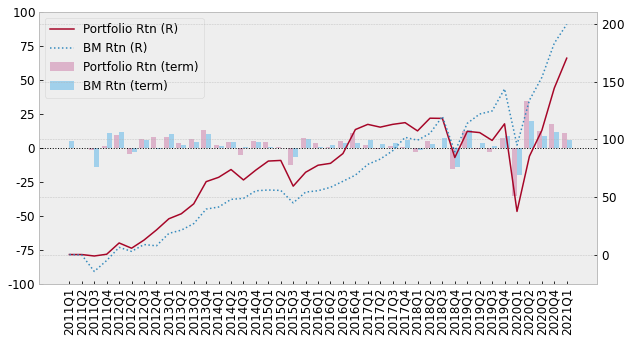

In [69]:
fs.draw_return(df)